# Clique em "Ambiente de execução --> executar tudo"

Bárbara Cardoso e Vinicius Lima


In [ ]:
import matplotlib.pyplot as plt
import sympy
import numpy as np
from  sympy import  Symbol
# from sympy.abc import s, t, c, m, k
from math import e, sqrt, sin
sympy.init_printing()

# Digite o tempo para continuar a execução do programa

In [ ]:
t_final = int(input("Digite o tempo em segundos: "))

Digite o tempo em segundos: 2


In [ ]:
def main():
    #****passa os valores para calculo****
    # n passos, intervalo e valor de t
    n = 1000
    dt = float(t_final) / n
    tempo = [dt * i for i in range(n)]

    # valores para h(t) e x(t)
    h_t = hT(tempo)
    x_t = xT(tempo)


    # Cálculo método Trapézio
    trapezio = calculoTrapezio(x_t, h_t, dt)

    #gráfico
    grafico(trapezio, tempo, "Plotagem usando metódo do Trapézio")


# Cáculo usando a transformada de laplace e plotagem do gráfico

In [ ]:
#simbolos
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)
u = sympy.Function('u')
y = sympy.Function('y')

In [ ]:
#sinal entrada
f = t*sympy.exp(-a*t)
F = sympy.laplace_transform(f, t, s, noconds=True)

In [ ]:
#integral - sinal entrada
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧        1                          π
⎪   ───────────      for │arg(s)│ ≤ ─
⎪             2                     2
⎪    2 ⎛a    ⎞                       
⎪   s ⋅⎜─ + 1⎟                       
⎪      ⎝s    ⎠                       
⎨                                    
⎪∞                                   
⎪⌠                                   
⎪⎮    -a⋅t  -s⋅t                     
⎪⎮ t⋅ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                   
⎩0                                   

In [ ]:
#transformada
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

In [ ]:
#transformada inversa
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
#função unitaria e expressão( EDO)
u = -1


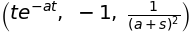

In [ ]:
#expressão, u, transformada
f,u, F

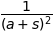

In [ ]:
#Transformada
L(f)

In [ ]:
#transformação inversa
invL(L(f))

In [ ]:
#passo
sympy.Heaviside(t)

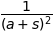

In [ ]:
#expressão transformada Laplace
Y = sympy.Function('Ys')
Y = 1 / (a + s)**2
Y

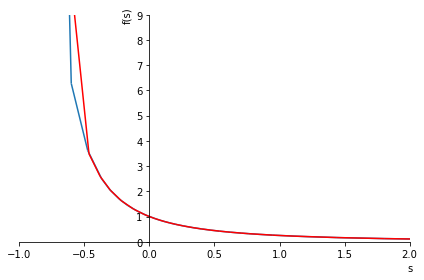

In [ ]:
#plotagem transformada
invL(F).subs({a: 1})
p = sympy.plot(Y.subs({a: 1}), Y.subs({a: 1}),
               xlim=(-1, t_final), ylim=(0, 9), show=False)
p[1].line_color = 'red'

p.show()

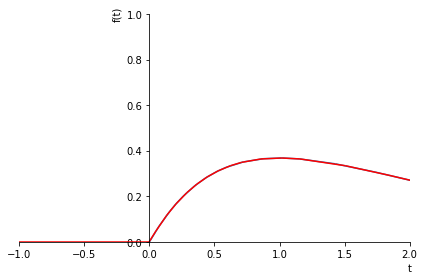

In [ ]:
#plotagem transformada inversa
p = sympy.plot(f.subs({a: 1}), invL(Y).subs({a: 1}),
               xlim=(-1, t_final), ylim=(0, 1), show=False)
p[1].line_color = 'red'
p.show()

# Cálculo usando integral númerica pelo método do trapézio

In [ ]:
#sinal de entrada x(t)
def xT(tempo):
    y2 = []
    for t in tempo:
        x = t*e**-t
        y2.append(x)
    return y2




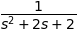

In [ ]:
#resposta do impulso h(s)
ht = 1 / (2+ 2*s + s**2)
ht

In [ ]:
#resposta do impulso h(t)
ht_tempo = invL(ht)
ht_tempo

In [ ]:
def hT(tempo):
    y1 = []
    for t in tempo:
        x = e**(-t) * sin(t)
        y1.append(x)
    return y1


In [ ]:

#calculo da integral de convolução - método do trapézio
def calculoTrapezio(x_t, h_t, dx = None):
    # tamanho do sinal
    P = len(h_t)
    z = []

    # calculo integral
    for j in range(P):
        t = 0
        t_min = max(0, j - (P - 1))
        t_max = min(P - 1, j)
        for i in range(t_min, t_max):
            t += (h_t[i] * x_t[j - i] + h_t[i + 1] * x_t[j - (i + 1)]) / 2
        z.append(t)
    z = np.array(z)
    if dx != None:
        z *= dx
    return z

In [ ]:
def grafico(trapezio, t, titulo):
    plt.ioff()
    fig = plt.figure(figsize=(14, 12))
    plt.title(titulo)
    plt.grid(True)
    plt.xlabel('t(s)')
    plt.ylabel('Y(t)')
    plt.plot(t, trapezio, label='Trapézio')
    plt.legend()
    plt.show()


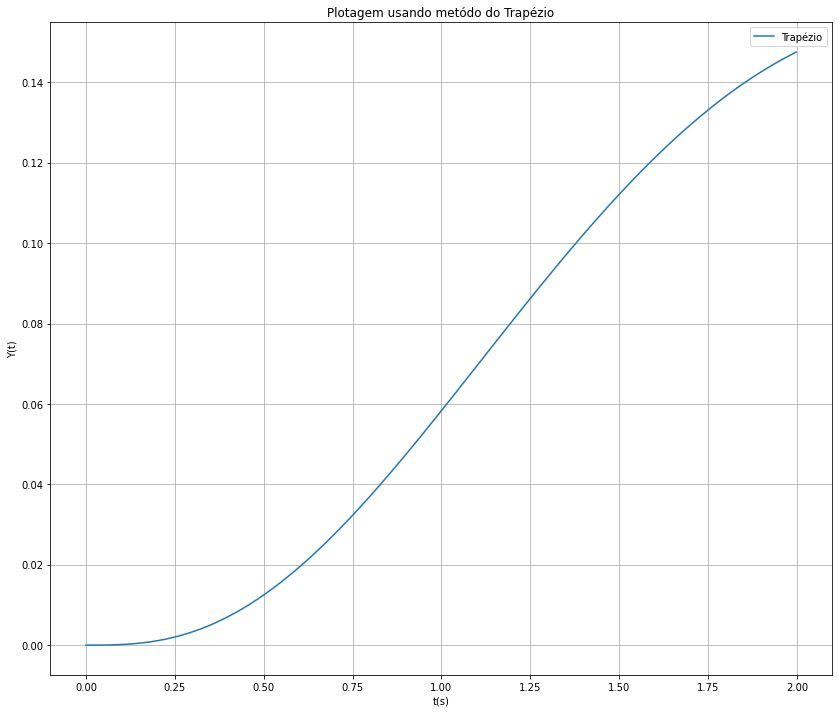

In [ ]:



if __name__ == '__main__':
    # Cálculo método Trapézio
    main()